In [1]:
# Austin Perales - INFO 3000

In [2]:
# Part 1

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#Reading Data
data = pd.read_csv('price_Optimization.csv')

In [5]:
data.head()

,Competitors_Price,Demand
0,5.939322,993.716473
1,7.436704,993.329599
2,6.424870,993.499055
3,5.903949,993.758589
4,4.812893,993.679768


In [6]:
#Seperating X and y variables
X = data['Competitors_Price'].values.reshape(-1,1)
y = data['Demand'].values.reshape(-1,1)

print(f"Shape of X:{X.shape} and y {y.shape}\n")
print(f"X:\n{X[:10]}\n\ny\n{y[:10]}")

Shape of X:(100, 1) and y (100, 1)

X:
[[5.93932154]
 [7.4367043 ]
 [6.42487038]
 [5.90394865]
 [4.81289319]
 [6.81304702]
 [4.9382849 ]
 [9.02595701]
 [9.67296484]
 [4.45097367]]

y
[[993.716473  ]
 [993.32959908]
 [993.49905549]
 [993.75858897]
 [993.67976795]
 [993.3457197 ]
 [993.68506258]
 [993.20474236]
 [993.1824333 ]
 [993.78976153]]


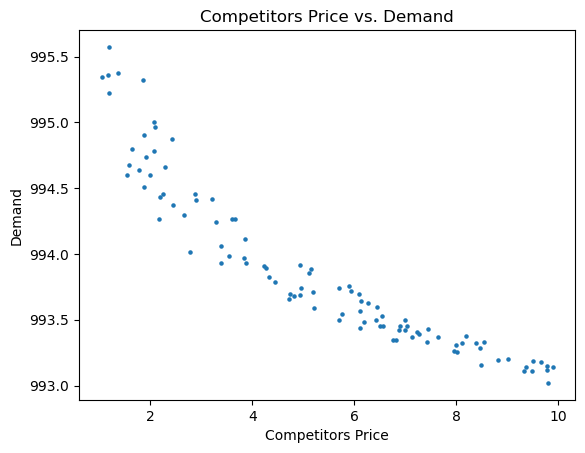

In [7]:
#Visualize the data
plt.scatter(X,y,s=5)
plt.xlabel('Competitors Price')
plt.ylabel('Demand')
plt.title('Competitors Price vs. Demand')
plt.show()

In [8]:
#Import Train Test Split
from sklearn.model_selection import train_test_split 

In [9]:
#Split the data into train and test parts
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.1,random_state=42)

print(X_train.shape,X_test.shape,type(X_train))

(90, 1) (10, 1) <class 'numpy.ndarray'>


In [10]:
#Import Linear Regression
from sklearn.linear_model import LinearRegression 

In [11]:
#Instantiate an object from the class
linreg = LinearRegression()

#Use the training data to train a model
linreg.fit(X_train,y_train)

#Predict y_train from X_train
y_train_pred = linreg.predict(X_train)

In [12]:
#Predict on the retained test values
y_pred = linreg.predict(X_test)

print(f"Predicted values for the test data are:\n{y_pred}")

Predicted values for the test data are:
[[993.42781029]
 [994.64490778]
 [992.84240328]
 [993.47281907]
 [993.480799  ]
 [993.44976778]
 [993.9039751 ]
 [994.19977585]
 [993.2232119 ]
 [993.72394588]]


In [13]:
#To measure the metrics of our models
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [14]:
#RMSE
print(f"Root Means Sqaure Error of our model is: {np.sqrt(mean_squared_error(y_train_pred,y_train))}")

Root Means Sqaure Error of our model is: 0.24266269382613853


In [15]:
#RMSE for Test
print(f"Root Mean Square Error on test data: {np.sqrt(mean_squared_error(y_pred,y_test))}")

Root Mean Square Error on test data: 0.10495960540153917


In [19]:
#Synthetically creating new data
newData = np.random.uniform(low=1.0, high=10.0, size=(100,1))

#Print to check for validity
print(f"Shape of newData:{newData.shape}")
print(f"\nnewData:\n{newData[:10]}")

Shape of newData:(100, 1)

newData:
[[2.96830974]
 [8.66808653]
 [7.86067143]
 [6.38358013]
 [1.51273763]
 [1.79210482]
 [5.59387403]
 [4.86347738]
 [7.7769161 ]
 [1.73949654]]


In [17]:
#Coefficients
coefficients = linreg.coef_
intercept = linreg.intercept_

print(f"Slope: {coefficients} and Intercept: {intercept}") 

Slope: [[-0.22904268]] and Intercept: [995.08430402]


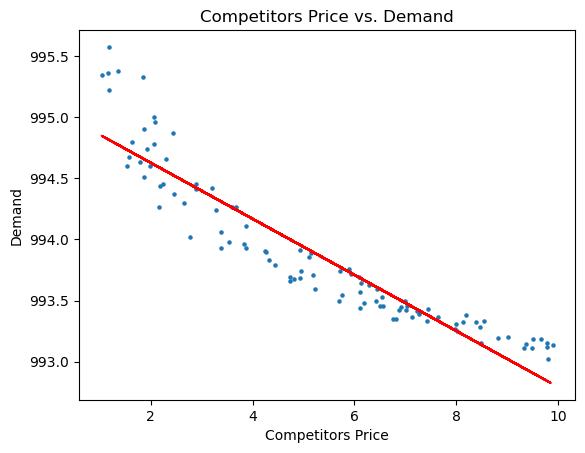

In [18]:
#Line of regression of newData superimposed on the original data
plt.scatter(X,y,s=5)
plt.plot(newData,linreg.predict(newData),c='r')
plt.xlabel('Competitors Price')
plt.ylabel('Demand')
plt.title('Competitors Price vs. Demand')
plt.show()

Question 5:

a) I found that my model did generalize pretty well on the test data. I found an RMSE of 0.243 for the model and 0.105 on the test data, which could be better, but it isn't bad. Looking at my scatter plot, you can see the line of best fit covers the majority of the middle areas, from an x value of 2-8, but the extremes are not generalized well.

b) Looking at the line of best fit, I do not think the Linear Regression model will give the optimal strategic pricing. The shape of the data seems to be polynomial, and decreases exponentially as the competitors price increases. I believe a polynomial regression will create the line of best fit, and a linear regression is okay, but not optimal. You would probably be okay with a linear regression, but would prefer to have a polynomial regression to find the best strategic pricing strategy.